# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

# 1. Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [135]:
data = pd.read_csv("assignment3_creditcard.csv")

In [136]:
# data를 직접확인합니다.
data.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0


In [137]:
# 변수별 datatype및 변수명을 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28678 non-null  float64
 1   V2      28678 non-null  float64
 2   V3      28678 non-null  float64
 3   V4      28678 non-null  float64
 4   V5      28678 non-null  float64
 5   V6      28678 non-null  float64
 6   V7      28678 non-null  float64
 7   V8      28678 non-null  float64
 8   V9      28678 non-null  float64
 9   V10     28678 non-null  float64
 10  V11     28678 non-null  float64
 11  V12     28678 non-null  float64
 12  V13     28678 non-null  float64
 13  V14     28678 non-null  float64
 14  V15     28678 non-null  float64
 15  V16     28678 non-null  float64
 16  V17     28678 non-null  float64
 17  V18     28678 non-null  float64
 18  V19     28678 non-null  float64
 19  V20     28678 non-null  float64
 20  V21     28678 non-null  float64
 21  V22     28678 non-null  float64
 22

In [138]:
# 범주형 변수를 처리합니다.
data["Class"] = pd.Series(data["Class"], dtype = "category")
features = data.iloc[:, :-1]
target = data.iloc[:, -1]


# 각 변수별 기초통계량을 확인합니다.
data.describe(include='all')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28432.0
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535,NaN
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736,NaN
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915,NaN
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189,NaN
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075,NaN
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911,NaN


In [139]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

s_features = pd.DataFrame(scaler.fit_transform(features), columns= features.columns)

# scaling은 설명 변수에만 진행합니다.
s_features.describe(include='all')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,0.926714,0.663520,0.882983,0.320081,0.561078,0.493178,0.530233,0.662568,0.622611,0.614594,...,0.469792,0.449133,0.441133,0.515181,0.791764,0.407605,0.727596,0.417730,0.399891,0.391878
std,0.061651,0.025396,0.049986,0.084752,0.019811,0.030124,0.018608,0.023017,0.052632,0.031600,...,0.084024,0.015125,0.017411,0.042870,0.012821,0.090510,0.056160,0.090197,0.021400,0.012088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.899356,0.653636,0.858708,0.269722,0.552003,0.476073,0.523619,0.658989,0.592752,0.601923,...,0.422444,0.444675,0.436287,0.483957,0.788400,0.354327,0.693265,0.356851,0.396037,0.389689
50%,0.927791,0.663861,0.889427,0.317440,0.560728,0.487149,0.531347,0.662845,0.620914,0.613176,...,0.469277,0.447760,0.440330,0.515643,0.791626,0.413741,0.729955,0.407385,0.399950,0.392267
75%,0.967164,0.675357,0.913573,0.362089,0.569699,0.502188,0.538041,0.668026,0.651582,0.627254,...,0.516566,0.451833,0.444710,0.545734,0.795039,0.473317,0.766055,0.462745,0.404779,0.395030
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [140]:
# target변수의 분포를 확인합니다.
y.value_counts()

# 상당히 편향 되어 있는 것을 확인할 수 있습니다.

0    28432
1      246
Name: Class, dtype: int64

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

# train과 test로 나누어 줍니다.
X_train, X_test, y_train, y_test = train_test_split(s_features, target, test_size=0.2, random_state = 11, stratify = target)


In [142]:
# 나눈 data의 shape을 확인합니다.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22942, 28) (5736, 28) (22942,) (5736,)


In [143]:
# Logistic Regression을 적합합니다.
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [144]:
# test dataset의 class를 예측합니다.
y_pred = model.predict(X_test) 
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [145]:
# [0으로 분류될 확률, 1로 분류될 확률]
model.predict_proba(X_test)

array([[0.9976856 , 0.0023144 ],
       [0.99399716, 0.00600284],
       [0.99858368, 0.00141632],
       ...,
       [0.99853482, 0.00146518],
       [0.99868098, 0.00131902],
       [0.99828671, 0.00171329]])

# 3. 성능지표

In [146]:
confusion_matrix(y_pred, y_test)


array([[5685,   19],
       [   2,   30]], dtype=int64)

In [147]:
tn, fn, fp, tp = confusion_matrix(y_pred, y_test).ravel()
p = fn + tp
n = tn + fp

accuracy = (tp + tn) / (p + n)
print("Accuracy : ", accuracy) 

precision = tp/ (tp + fp)
print("precision : ", precision)

recall = (tp) / p
print("Recall : ", recall)

f1 = f1_score(y_pred, y_test)
print("f1 : ", f1)

Accuracy :  0.9963389121338913
precision :  0.9375
Recall :  0.6122448979591837
f1 :  0.7407407407407408


위에서 data가 상당히 편향되어 있는 것을 확인 하였습니다.  
0이 너무 많습니다.  
따라서 ACC가 항상 높게 나올수 밖에 없습니다.  
예를들어 위 모델이 항상 0만을 output하는 모델이라면 확실하게 성능이 좋지 않은 모델이지만  
ACC는 (28432 / (28432+246) ) = 0.9914219959550875의 값을 가집니다.  
따라서 이 데이터에는 ACC의 값은 좋은 지표가 되지 못합니다.  
이를 보완하고자  Precision과 Recall의 조화 평균인 F1 score를 보아야 합니다.  
Precision과 Recall는 trade - off관계 이므로 cutoff를 조정하면서 직접 확인하는 것이 성능개선에 도움이 됩니다.

In [167]:

column_name = data.keys()
beta = np.concatenate([model.intercept_,model.coef_.reshape(-1)]).round(2)
odds = np.exp(beta).round(2)

beta_analysis = pd.DataFrame(np.c_[beta,odds],index=column_name,columns=["beta","exp(beta)"])


In [168]:
Xbeta=np.matmul(np.c_[np.ones(X_test.shape[0]),X_test],beta.reshape(-1,1))

#P(Y=1) 계산
P_1=1/(1+np.exp(-Xbeta))

f1_list = list()

Cut_off=np.linspace(0.01,0.99,20) #cut off 값 만들기
for cutoff in Cut_off:
  y_pred=np.where(P_1.reshape(-1)>=cutoff,1,0)
  
  tn, fn, fp, tp = confusion_matrix(y_pred, y_test).ravel()
  p = fn + tp
  n = tn + fp

  print("current cutoff is :", str(cutoff))
  
  accuracy = (tp + tn) / (p + n)
  print("Accuracy : ", accuracy) 

  precision = tp/ (tp + fp)
  print("precision : ", precision)

  recall = (tp) / p
  print("Recall : ", recall)

  f1 = f1_score(y_pred, y_test)
  print("f1 : ", f1)
  print('-'*30)
  f1_list += [f1]
  

current cutoff is : 0.01
Accuracy :  0.9879707112970711
precision :  0.41228070175438597
Recall :  0.9591836734693877
f1 :  0.5766871165644172
------------------------------
current cutoff is : 0.06157894736842105
Accuracy :  0.9977336122733612
precision :  0.875
Recall :  0.8571428571428571
f1 :  0.8659793814432989
------------------------------
current cutoff is : 0.1131578947368421
Accuracy :  0.9980822873082287
precision :  0.9318181818181818
Recall :  0.8367346938775511
f1 :  0.8817204301075268
------------------------------
current cutoff is : 0.16473684210526315
Accuracy :  0.9980822873082287
precision :  0.9523809523809523
Recall :  0.8163265306122449
f1 :  0.8791208791208791
------------------------------
current cutoff is : 0.2163157894736842
Accuracy :  0.997907949790795
precision :  0.9512195121951219
Recall :  0.7959183673469388
f1 :  0.8666666666666666
------------------------------
current cutoff is : 0.26789473684210524
Accuracy :  0.99721059972106
precision :  0.945945

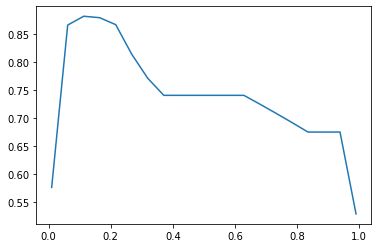

In [169]:
plt.plot(np.linspace(0.01,0.99,20),f1_list)

In [170]:

Xbeta=np.matmul(np.c_[np.ones(X_test.shape[0]),X_test],beta.reshape(-1,1))

#P(Y=1) 계산
P_1=1/(1+np.exp(-Xbeta))

f1_list = list()

Cut_off= [0.1131578947368421] #cut off 값 만들기
for cutoff in Cut_off:
  y_pred=np.where(P_1.reshape(-1)>=cutoff,1,0)
  
  tn, fn, fp, tp = confusion_matrix(y_pred, y_test).ravel()
  p = fn + tp
  n = tn + fp

  print("current cutoff is :", str(cutoff))
  
  accuracy = (tp + tn) / (p + n)
  print("Accuracy : ", accuracy) 

  precision = tp/ (tp + fp)
  print("precision : ", precision)

  recall = (tp) / p
  print("Recall : ", recall)

  f1 = f1_score(y_pred, y_test)
  print("f1 : ", f1)
  print('-'*30)
  f1_list += [f1]
  

current cutoff is : 0.1131578947368421
Accuracy :  0.9980822873082287
precision :  0.9318181818181818
Recall :  0.8367346938775511
f1 :  0.8817204301075268
------------------------------


In [171]:
# cutoff 비교

Cut_off= [0.5] #cut off 값 만들기
for cutoff in Cut_off:
  y_pred=np.where(P_1.reshape(-1)>=cutoff,1,0)
  
  tn, fn, fp, tp = confusion_matrix(y_pred, y_test).ravel()
  p = fn + tp
  n = tn + fp

  print("current cutoff is :", str(cutoff))
  
  accuracy = (tp + tn) / (p + n)
  print("Accuracy : ", accuracy) 

  precision = tp/ (tp + fp)
  print("precision : ", precision)

  recall = (tp) / p
  print("Recall : ", recall)

  f1 = f1_score(y_pred, y_test)
  print("f1 : ", f1)
  print('-'*30)
  f1_list += [f1]
  
Cut_off= [0.1131578947368421] #cut off 값 만들기
for cutoff in Cut_off:
  y_pred=np.where(P_1.reshape(-1)>=cutoff,1,0)
  
  tn, fn, fp, tp = confusion_matrix(y_pred, y_test).ravel()
  p = fn + tp
  n = tn + fp

  print("current cutoff is :", str(cutoff))
  
  accuracy = (tp + tn) / (p + n)
  print("Accuracy : ", accuracy) 

  precision = tp/ (tp + fp)
  print("precision : ", precision)

  recall = (tp) / p
  print("Recall : ", recall)

  f1 = f1_score(y_pred, y_test)
  print("f1 : ", f1)
  print('-'*30)
  f1_list += [f1]

current cutoff is : 0.5
Accuracy :  0.9963389121338913
precision :  0.9375
Recall :  0.6122448979591837
f1 :  0.7407407407407408
------------------------------
current cutoff is : 0.1131578947368421
Accuracy :  0.9980822873082287
precision :  0.9318181818181818
Recall :  0.8367346938775511
f1 :  0.8817204301075268
------------------------------


순서대로 cutoff 변경 전과 변경 후 입니다.  
성능이 개선 된 것을 확인할 수 있습니다.